### Template Matching

#### Teoria

A correspondência de modelos, ou mais conhecidos como template matching, é um método de procurar e localizar o "local" de uma imagem de modelo em uma imagem maior. O OpenCV vem com a função **cv2.matchTemplate()** para essa finalidade.
Ele simplesmente desliza a imagem do modelo sobre a imagem de entrada (como na convolução 2D) e compara o modelo e o patch da imagem de entrada sob a imagem do modelo. Vários métodos de comparação são implementados no OpenCV. O retorno da função é uma imagem em escala de cinza, em, que cada pixel indica o quanto a vizinhança desse pixel corresponde ao modelo.

Se a imagem de entrada for do tamanho (WxH) e a imagem do modelo for do tamanho (wxh), a imagem de saída terá o tamanho (W-w + 1, H-h + 1). Depois de obter o resultado, você pode usara função **cv2.minMaxLoc()** para descobrir onde está o valor máximo/mínimo; Tome-o como o canto superior esquerdo do retângulo e interprete (w,h) como largura e altura do retângulo. Esse retângulo é sua região de modelo.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

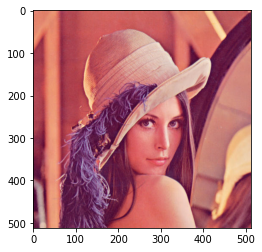

In [6]:
full = cv2.imread(r'C:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\007-feature-extraction\images\ex_template_matching.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

##### Vamos usar o rosto da Lena como uma sub-imagem

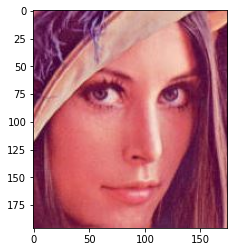

In [7]:
face = cv2.imread(r'C:\Users\shuel\Documents\Workspace\computer-vision\computer-vision-meganha\007-feature-extraction\images\rosto_template.JPG')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
plt.imshow(face)

##### Eval é usada para converter uma string em uma função

In [8]:
sum([1,2,3])

6

In [11]:
mystring = 'sum'

In [12]:
myFunc = eval(mystring)

In [13]:
myFunc([1,2,3])

6

##### Funções template matching

In [19]:
# Alttura, Largura e canal do template matching
height, width, channels = face.shape

# Todos os 6 métodos para comparação em uma lista
# 'cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR.NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED'
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

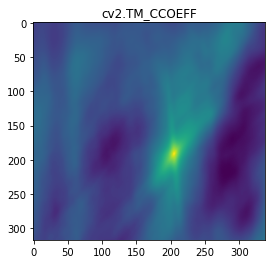

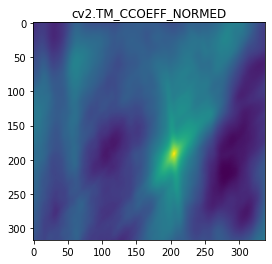

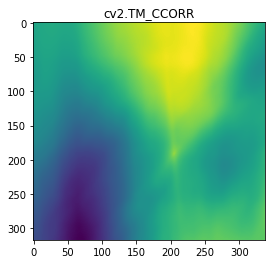

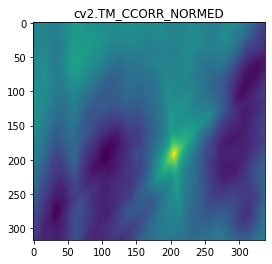

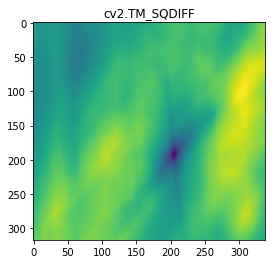

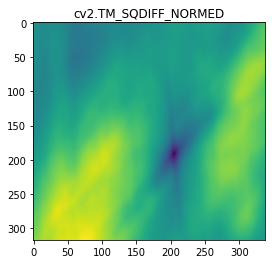

In [21]:
for m in methods:

    # Criar uma copia da imagem
    full_copy = full.copy()

    # Usar a função eval pasasndo as strings
    method = eval(m)

    # Aplicar o TM com os metodos
    res = cv2.matchTemplate(full_copy, face, method)
    
    plt.imshow(res)
    plt.title(m)
    plt.show()

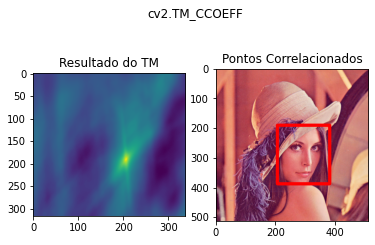

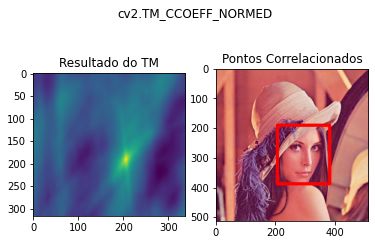

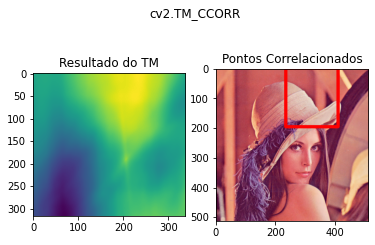

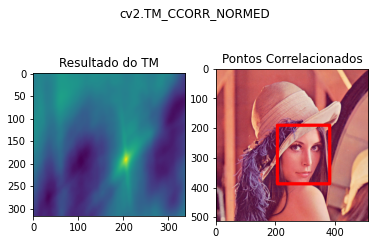

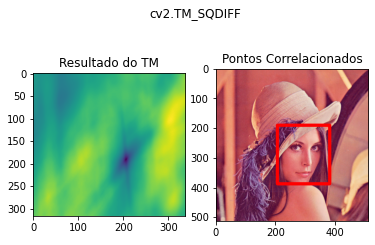

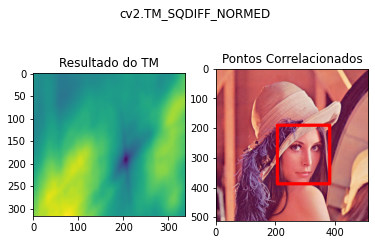

In [22]:
for m in methods:
    
    # Criar uma copia da imagem
    full_copy = full.copy()

    # Usar a função eval pasasndo as strings
    method = eval(m)

    # Aplicar o TM com os metodos
    res = cv2.matchTemplate(full_copy, face, method)

    # Pegar os valores Max e Min, além de seus locais
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Configurar os retângulos
    # Se o método for o TM_SQDIFF ou TM_SQDIFF_NORMED pegar o min
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc 
    else:
        top_left = max_loc

    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Desenhar o retangulo
    cv2.rectangle(full_copy, top_left, bottom_right, 255, 10)
    
    # Plot das imgs
    plt.subplot(121) # 1 linha, 2 colunas, 1 (sou a primeira)
    plt.imshow(res)
    plt.title('Resultado do TM')

    plt.subplot(122) # 1 linha, 2 colunas, 2 (sou a segunda)
    plt.imshow(full_copy)
    plt.title('Pontos Correlacionados')
    plt.suptitle(m)

    plt.show()
    print('\n')